In [551]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import random

# Q1

In [578]:
class DecisionTree:
    def __init__(self):
        self.node_counter = 0  # Initialize a node counter
        self.leaf_counter=0
        
    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)
        self.shape = len(y)

    def predict(self, X):
        return [self._predict(x, self.tree) for x in X]

    def _grow_tree(self, X, y):
        num_samples, num_features = X.shape

        if len(np.unique(y)) == 1 or num_samples == 0:
            self.leaf_counter+=1
            #print('leaf' + str(self.leaf_counter))
            return ("leaf" + str(self.leaf_counter), np.unique(y)[0])  # Node labeled with node_counter
        else:
            self.node_counter += 1
           # print('node' + str(self.node_counter) )

        best_gain = -1
        best_feature = None
        best_c = None

        H_y = self._entropy(y)
        gain_ratio = []
        for feature in range(num_features):
            feature_values = np.unique(X[:, feature])
            for c in feature_values:
                left_indices = X[:, feature] >= c
                right_indices = X[:, feature] < c

                y_left = y[left_indices]
                y_right = y[right_indices]

                H_left = self._entropy(y_left)
                H_right = self._entropy(y_right)

                H_condition_y = (
                    (len(y_left) / num_samples) * H_left
                    + (len(y_right) / num_samples) * H_right
                )

                information_gain = H_y - H_condition_y
                
                if any(left_indices) and any(right_indices):
                    H_X = -(
                        (len(y_left) / num_samples) * np.log2(len(y_left) / num_samples)
                        + (len(y_right) / num_samples) * np.log2(len(y_right) / num_samples)
                    )
                    # Avoid division by zero
                    g_ = (
                        information_gain / (H_X + np.finfo(float).eps)
                    )
                    #print('node' + str(self.node_counter) + ': feature: x'+str(feature + 1), 
                    #      '; cut c: ', c, '; information gain ratio: ', g_)
                    gain_ratio.append(g_)
                    if g_ > best_gain:
                        best_gain = g_
                        best_feature = feature
                        best_c = c
                #else:
                 #   print('node' + str(self.node_counter) + ': feature: x'+str(feature + 1), 
                  #        '; cut c: ', c, '; information gain: ', information_gain)

        gain_ratio = np.array(gain_ratio)
        if best_gain > 0:
            left_indices = X[:, best_feature] >= best_c
            right_indices = X[:, best_feature] < best_c
           # print('node' + str(self.node_counter) + ' best feature: x'+str(best_feature+1),
            #      '; best cut c:', best_c)
            node=self.node_counter
            left_subtree = self._grow_tree(X[left_indices], y[left_indices])
            right_subtree = self._grow_tree(
                X[right_indices], y[right_indices]
            )

           # return ("node" + str(node), 'x'+str(best_feature+1)+'≥'+str(best_c), left_subtree, right_subtree)
            return ("node" + str(node),best_feature+1,best_c, left_subtree, right_subtree)

        # If no best split found, return the majority class as the leaf node's prediction
        majority_class = np.argmax(np.bincount(y))
        return ("node" + str(self.node_counter), majority_class)


    def _predict(self, x, tree):
        if isinstance(tree, tuple) and tree[0].startswith("node"):
            node_label = tree[0]
            feature, c, left_subtree, right_subtree = tree[1:]
            if x[feature-1] >= c:
                return self._predict(x, left_subtree)
            else:
                return self._predict(x, right_subtree)
        else:
            return tree[1] # Return the class label for leaf nodes

    def _entropy(self, y):
        num_samples = len(y)
        if num_samples == 0:
            return 0

        p0 = np.sum(y == 0) / num_samples
        p1 = 1 - p0

        if p0 == 0 or p1 == 0:
            return 0

        return -p0 * np.log2(p0) - p1 * np.log2(p1)
    
    def tree_structure(self):
        def generate_structure(node,level):
            if isinstance(node, tuple):
                node_label = node[0]
                if node_label.startswith("node"):
                    feature, threshold, left_subtree, right_subtree = node[1:]
                    left_structure = generate_structure(left_subtree, level + 1)
                    if node_label=='node1':
                        right_structure = generate_structure(right_subtree, level+1 )
                    else:
                        right_structure = generate_structure(right_subtree, level+1 )
                    if node_label=='node1':
                        return (f"{node_label} "
                            f"(x{feature}≥{threshold})\n"
                            f"{left_structure}\n"
                            f"{right_structure}")
                    else:
                        return (
                            f"{'|    ' * (level-1)}|---- {node_label} "
                            f"(x{feature}≥{threshold})\n"
                            f"{left_structure}\n"
                            f"{right_structure}"
                        )
                elif node_label.startswith("leaf"):
                    class_label = node[1]
                    return f"{'|    ' * (level-1)}|---- {node_label} (y={class_label})"
            else:
                return "Invalid node format"

        if hasattr(self, 'tree'):
            return generate_structure(self.tree,0)
        else:
            return "Decision tree not fitted yet. Use the 'fit' method to build the tree."


In [540]:
#test
X = np.array([[1.0, 3.0],
              [1.0, 3.0],
              [2.0, 3.0],
              [2.0, 3.0],
              [2.0, 1.0],
              [2.0, 3.0]])
y = np.array([0, 0, 1, 1, 0, 1])

# Create and fit the decision tree classifier
clf = DecisionTree()
clf.fit(X, y)
clf.tree
p=clf.tree_structure()
print(p)

node1 (x1≥2.0)
|---- node2-1 (x2≥3.0)
|    |---- leaf1 (y=1)
|    |---- leaf2 (y=0)
|---- leaf3 (y=0)


# Q2.2


In [269]:
X = np.array([[1.0, 2.0],
              [1.0, 2.0],
              [1.0, 2.0],
              [1.0, 2.0],
              [1.0, 2.0],
              [1.0, 2.0]])
y = np.array([0, 0, 1, 1, 0, 1])

clf = DecisionTree()
clf.fit(X, y)
clf.tree

('node1', 0)

# Q2.3

#### By applying the DecisionTree, it will present the node number, what feature and cut c it is focusing and information gain or ratio. Node number starts from 1

In [150]:
datapath='HW2_data/'
druns=np.loadtxt(datapath+'Druns.txt')

In [152]:
X=druns[:,:2]
y=druns[:,2]
clf = DecisionTree()
clf.fit(X, y)
clf.tree

node1
node1: feature: x1 ; cut c:  0.0 ; information gain:  0.0
node1: feature: x1 ; cut c:  0.1 ; information gain ratio:  0.10051807676021822
node1: feature: x2 ; cut c:  -2.0 ; information gain:  0.0
node1: feature: x2 ; cut c:  -1.0 ; information gain ratio:  0.10051807676021822
node1: feature: x2 ; cut c:  0.0 ; information gain ratio:  0.055953759631263505
node1: feature: x2 ; cut c:  1.0 ; information gain ratio:  0.005780042205152318
node1: feature: x2 ; cut c:  2.0 ; information gain ratio:  0.0011443495172767492
node1: feature: x2 ; cut c:  3.0 ; information gain ratio:  0.01641113684210213
node1: feature: x2 ; cut c:  4.0 ; information gain ratio:  0.04974906418177853
node1: feature: x2 ; cut c:  5.0 ; information gain ratio:  0.11124029586339798
node1: feature: x2 ; cut c:  6.0 ; information gain ratio:  0.23609960614360792
node1: feature: x2 ; cut c:  7.0 ; information gain ratio:  0.055953759631263505
node1: feature: x2 ; cut c:  8.0 ; information gain ratio:  0.430156916

('node1',
 'x2',
 8.0,
 ('leaf1', 1.0),
 ('node2',
  'x2',
  0.0,
  ('node3',
   'x2',
   6.0,
   ('node4', 'x2', 7.0, ('leaf2', 0.0), ('leaf3', 1.0)),
   ('leaf4', 0.0)),
  ('node5', 'x1', 0.1, ('leaf5', 0.0), ('leaf6', 1.0))))

# Q2.4

In [165]:
datapath='HW2_data/'
D3leaves=np.loadtxt(datapath+'D3leaves.txt')

In [166]:
X=D3leaves[:,:2]
y=D3leaves[:,2]
clf = DecisionTree()
clf.fit(X, y)
clf.tree

node1
node1: feature: x1 ; cut c:  1.0 ; information gain:  0.0
node1: feature: x1 ; cut c:  10.0 ; information gain ratio:  0.3315597072868287
node1: feature: x2 ; cut c:  1.0 ; information gain:  0.0
node1: feature: x2 ; cut c:  2.0 ; information gain ratio:  0.3315597072868287
node1: feature: x2 ; cut c:  3.0 ; information gain ratio:  0.1760651833687609
node1 best feature: x1 ; best cut c: 10.0
leaf1
node2
node2: feature: x1 ; cut c:  1.0 ; information gain:  0.0
node2: feature: x2 ; cut c:  1.0 ; information gain:  0.0
node2: feature: x2 ; cut c:  3.0 ; information gain ratio:  0.9999999999999998
node2 best feature: x2 ; best cut c: 3.0
leaf2
leaf3


('node1',
 'x1',
 10.0,
 ('leaf1', 1.0),
 ('node2', 'x2', 3.0, ('leaf2', 1.0), ('leaf3', 0.0)))

# Q2.5

note that each node have two '|----', the upper one is left branch, the lower one is right branch.

### For D1

In [168]:
datapath='HW2_data/'
D1=np.loadtxt(datapath+'D1.txt')

In [396]:
X=D1[:,:2]
y=D1[:,2]
clf = DecisionTree()
clf.fit(X, y)
clf.tree
p=clf.tree_structure()
print(p)

node1 (x2≥0.201829)
|---- leaf1 (y=1.0)
|---- leaf2 (y=0.0)


### For D2

In [397]:
datapath='HW2_data/'
D2=np.loadtxt(datapath+'D2.txt')

In [579]:
X=D2[:,:2]
y=D2[:,2]
clf = DecisionTree()
clf.fit(X, y)
clf.tree
p=clf.tree_structure()
print(p)

node1 (x1≥0.533076)
|---- node2 (x2≥0.228007)
|    |---- node3 (x2≥0.424906)
|    |    |---- leaf1 (y=1.0)
|    |    |---- node4 (x1≥0.708127)
|    |    |    |---- leaf2 (y=1.0)
|    |    |    |---- node5 (x2≥0.32625)
|    |    |    |    |---- node6 (x1≥0.595471)
|    |    |    |    |    |---- node7 (x1≥0.646007)
|    |    |    |    |    |    |---- leaf3 (y=1.0)
|    |    |    |    |    |    |---- node8 (x2≥0.403494)
|    |    |    |    |    |    |    |---- leaf4 (y=1.0)
|    |    |    |    |    |    |    |---- leaf5 (y=0.0)
|    |    |    |    |    |---- leaf6 (y=0.0)
|    |    |    |    |---- leaf7 (y=0.0)
|    |---- node9 (x1≥0.887224)
|    |    |---- node10 (x2≥0.037708)
|    |    |    |---- node11 (x2≥0.082895)
|    |    |    |    |---- leaf8 (y=1.0)
|    |    |    |    |---- node12 (x1≥0.960783)
|    |    |    |    |    |---- leaf9 (y=1.0)
|    |    |    |    |    |---- leaf10 (y=0.0)
|    |    |    |---- leaf11 (y=0.0)
|    |    |---- node13 (x1≥0.850316)
|    |    |    |---- no

# Q2.6

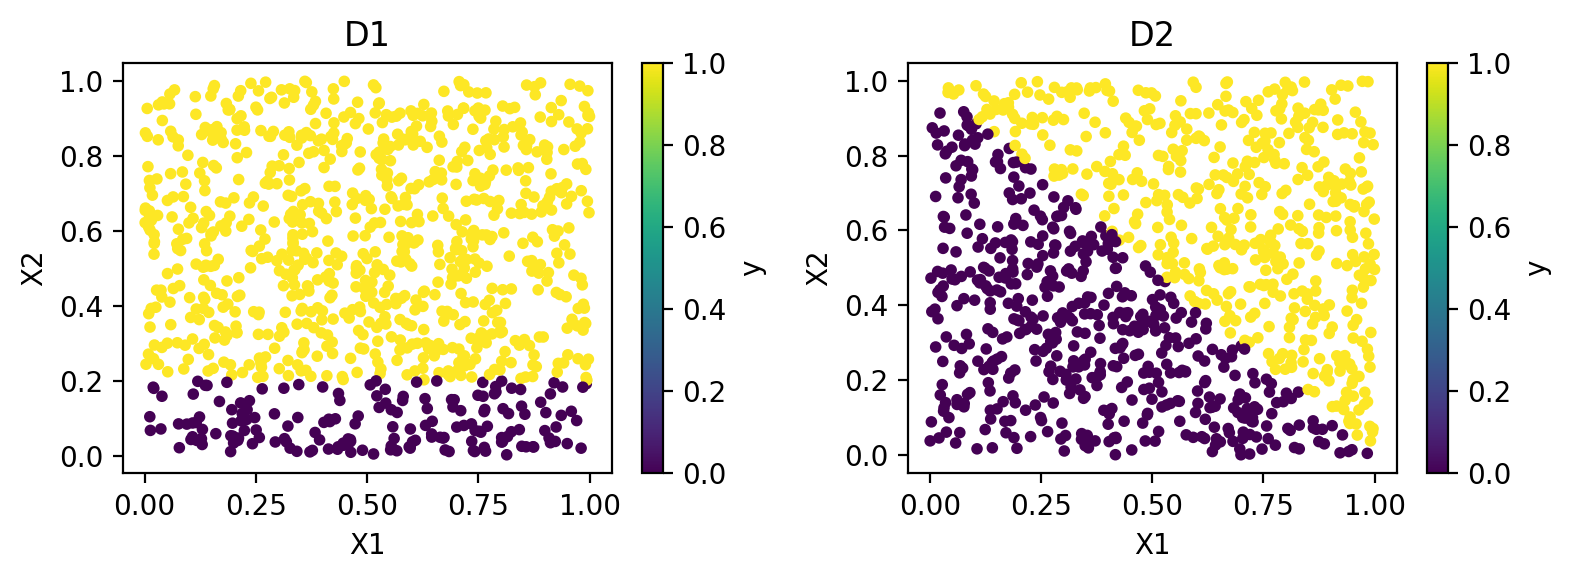

In [421]:
X=D1[:,:2]
y=D1[:,2]

x1_values = [point[0] for point in X]
x2_values = [point[1] for point in X]

plt.figure(figsize=(8,3),dpi=200)
plt.subplot(121)
plt.scatter(x1_values, x2_values, c=y, cmap='viridis', marker='o',s=10)
plt.colorbar(label='y')  
plt.title('D1')
plt.xlabel('X1')
plt.ylabel('X2')

plt.subplot(122)
X=D2[:,:2]
y=D2[:,2]

x1_values = [point[0] for point in X]
x2_values = [point[1] for point in X]
plt.scatter(x1_values, x2_values, c=y, cmap='viridis', marker='o',s=10)
plt.colorbar(label='y')  
plt.title('D2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.tight_layout()

(0.000585, 0.9905849999999999)

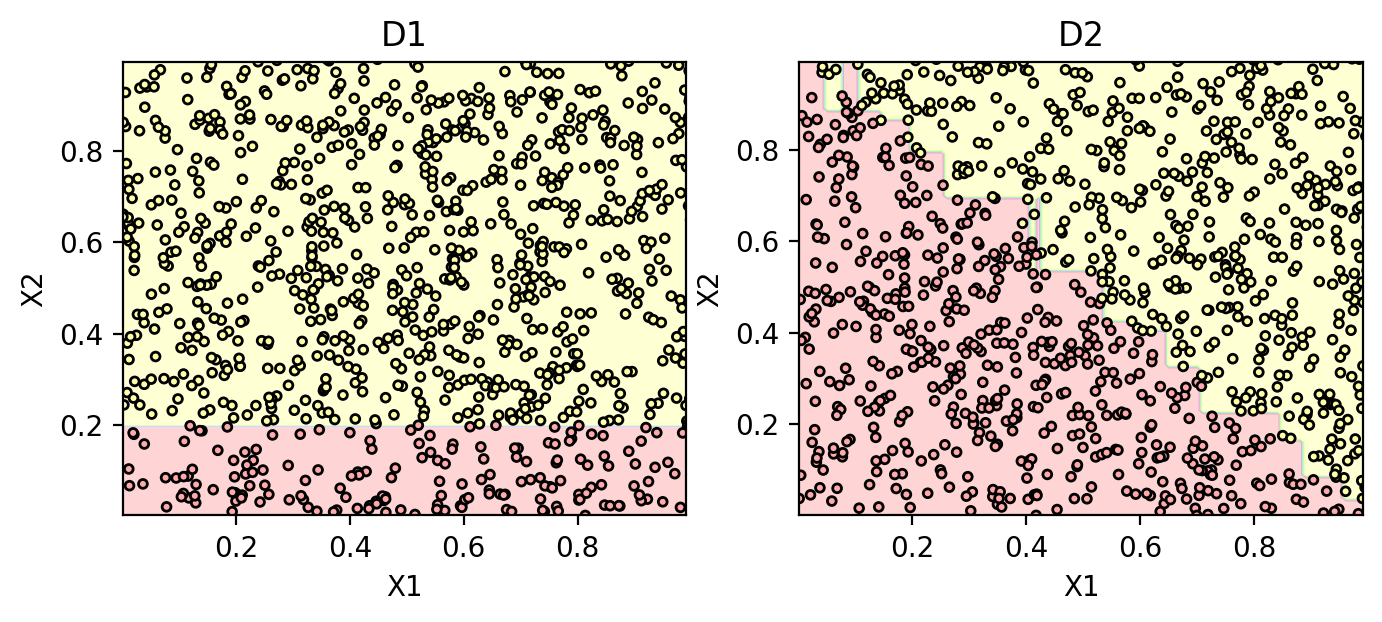

In [558]:
plt.figure(figsize=(8,3),dpi=200)
plt.subplot(121)
tree = DecisionTree()
X=D1[:,:2]
y=D1[:,2]

tree.fit(X, y)

x_min, x_max = X[:, 0].min() , X[:, 0].max() 
y_min, y_max = X[:, 1].min() , X[:, 1].max() 

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = np.array(tree.predict(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

cmap = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA', '#FFFFAA'])

plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k', s=10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('D1')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.subplot(122)
tree = DecisionTree()
X=D2[:,:2]
y=D2[:,2]

tree.fit(X, y)

x_min, x_max = X[:, 0].min() , X[:, 0].max() 
y_min, y_max = X[:, 1].min() , X[:, 1].max() 

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = np.array(tree.predict(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

cmap = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA', '#FFFFAA'])

plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k', s=10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('D2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


# Q2.7

In [441]:
datapath='HW2_data/'
Dbig=np.loadtxt(datapath+'Dbig.txt')


In [485]:
def err(y1,y2):
    return sum((y1-y2)**2)/len(y1)

#### Construction of sub dataset

In [589]:
def count_nodes_and_leaves(node):
    if isinstance(node, tuple):
        node_type = node[0]
        if node_type.startswith('node'):
            count = 1
            for child in node[3:]:
                count += count_nodes_and_leaves(child)
            return count
        elif node_type.startswith('leaf'):
            return 1
    return 0

In [491]:
X=Dbig[:,:2]
y=Dbig[:,2]
position=np.random.randint(0, len(y), 8192)
X8192=X[position]
y8192=y[position]
Xtest=np.delete(X,position,axis=0)
ytest=np.delete(y,position)
position=np.random.randint(0, len(y8192), 2048)
X2048=X8192[position]
y2048=y8192[position]
position=np.random.randint(0, len(y2048), 512)
X512=X2048[position]
y512=y2048[position]
position=np.random.randint(0, len(y512), 128)
X128=X512[position]
y128=y512[position]
position=np.random.randint(0, len(y128), 32)
X32=X128[position]
y32=y128[position]

In [590]:
clf32 = DecisionTree()
clf32.fit(X32, y32)
clf32.tree
p1=clf32.tree_structure()
y_pred32=clf32.predict(Xtest)
yerr32=err(y_pred32,ytest)
n32=count_nodes_and_leaves(clf32.tree)

clf128 = DecisionTree()
clf128.fit(X128, y128)
clf128.tree
p2=clf128.tree_structure()
y_pred128=clf128.predict(Xtest)
yerr128=err(y_pred128,ytest)
n128=count_nodes_and_leaves(clf128.tree)

clf512 = DecisionTree()
clf512.fit(X512, y512)
clf512.tree
p=clf512.tree_structure()
y_pred512=clf512.predict(Xtest)
yerr512=err(y_pred512,ytest)
n512=count_nodes_and_leaves(clf512.tree)

clf2048 = DecisionTree()
clf2048.fit(X2048, y2048)
clf2048.tree
p=clf2048.tree_structure()
y_pred2048=clf2048.predict(Xtest)
yerr2048=err(y_pred2048,ytest)
n2048=count_nodes_and_leaves(clf2048.tree)

clf8192 = DecisionTree()
clf8192.fit(X8192, y8192)
clf8192.tree
p=clf8192.tree_structure()
y_pred8192=clf8192.predict(Xtest)
yerr8192=err(y_pred8192,ytest)
n8192=count_nodes_and_leaves(clf8192.tree)

#### Answers

In [592]:

print('D32;  ', 'total nodes:', n32, '; error:',yerr32)
print('D128; ', 'total nodes:', n128, '; error:',yerr128)
print('D512; ', 'total nodes:', n512, '; error:',yerr512)
print('D2048;', 'total nodes:', n2048, '; error:',yerr2048)
print('D8192;', 'total nodes:', n8192, '; error:',yerr8192)

D32;   total nodes: 9 ; error: 0.16060398078242966
D128;  total nodes: 21 ; error: 0.10340883093113704
D512;  total nodes: 47 ; error: 0.06543125142987874
D2048; total nodes: 127 ; error: 0.036604895904827274
D8192; total nodes: 203 ; error: 0.01967513154884466


Text(0, 0.5, 'err')

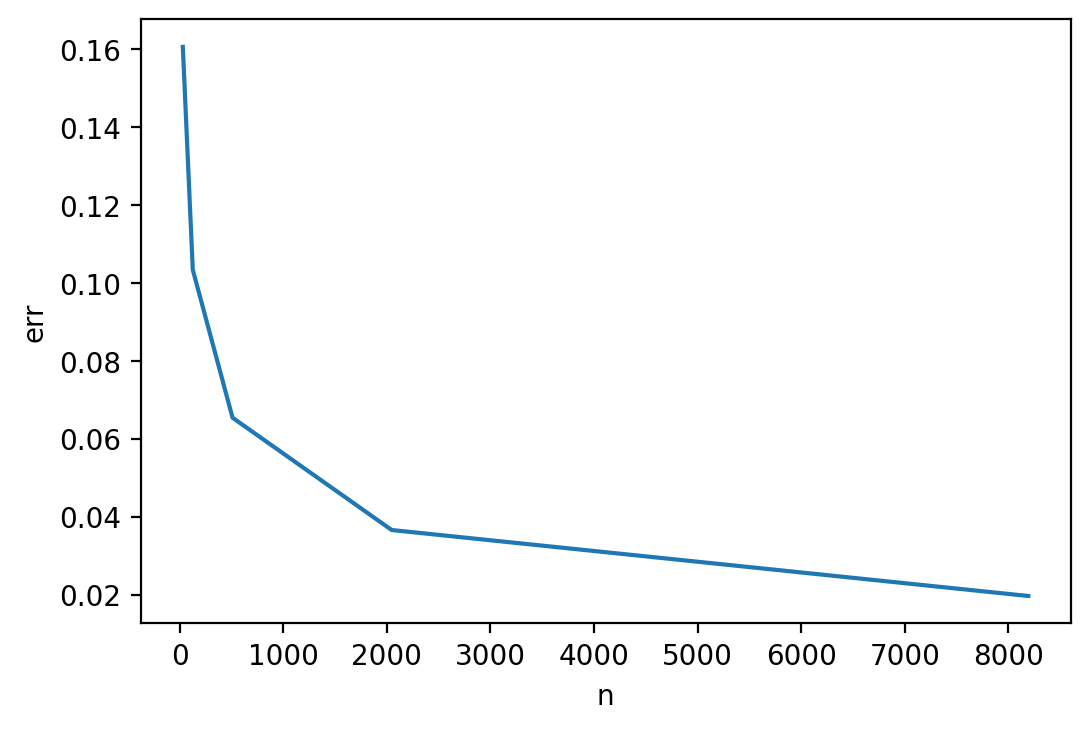

In [601]:
n=[32,128,512,2048,8192]
yerr=[yerr32,yerr128,yerr512,yerr2048,yerr8192]
plt.figure(dpi=200)
plt.plot(n,yerr)
plt.xlabel('n')
plt.ylabel('err')

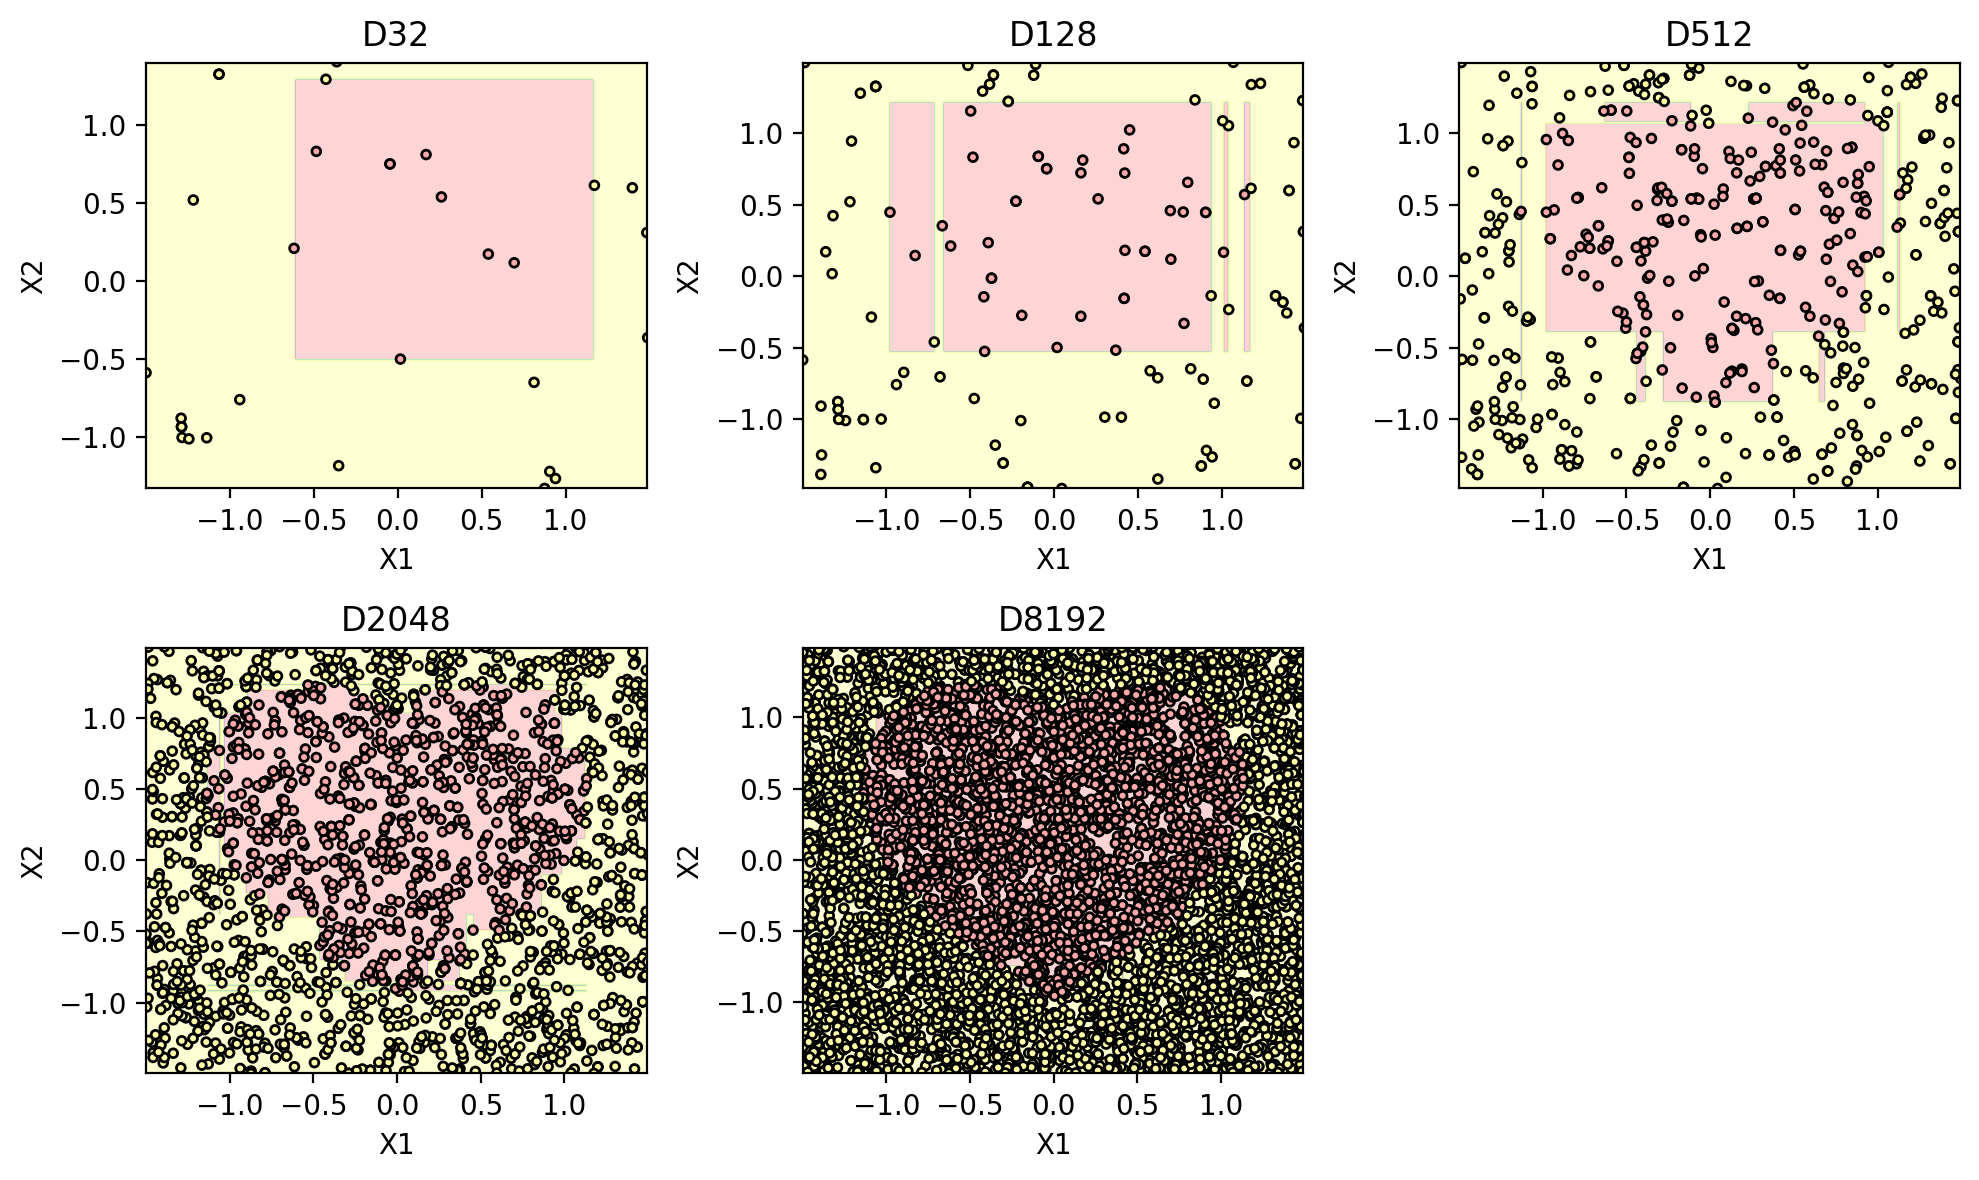

In [563]:
plt.figure(figsize=(10,6),dpi=200)

plt.subplot(231)
x_min, x_max = X32[:, 0].min() , X32[:, 0].max() 
y_min, y_max = X32[:, 1].min() , X32[:, 1].max() 
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = np.array(clf32.predict(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
cmap = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA', '#FFFFAA'])
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
plt.scatter(X32[:, 0], X32[:, 1], c=y32, cmap=cmap, edgecolor='k', s=10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('D32')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.subplot(232)
x_min, x_max = X128[:, 0].min() , X128[:, 0].max() 
y_min, y_max = X128[:, 1].min() , X128[:, 1].max() 
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = np.array(clf128.predict(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
cmap = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA', '#FFFFAA'])
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
plt.scatter(X128[:, 0], X128[:, 1], c=y128, cmap=cmap, edgecolor='k', s=10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('D128')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.subplot(233)
x_min, x_max = X512[:, 0].min() , X512[:, 0].max() 
y_min, y_max = X512[:, 1].min() , X512[:, 1].max() 
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = np.array(clf512.predict(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
cmap = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA', '#FFFFAA'])
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
plt.scatter(X512[:, 0], X512[:, 1], c=y512, cmap=cmap, edgecolor='k', s=10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('D512')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.subplot(234)
x_min, x_max = X2048[:, 0].min() , X2048[:, 0].max() 
y_min, y_max = X2048[:, 1].min() , X2048[:, 1].max() 
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = np.array(clf2048.predict(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
cmap = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA', '#FFFFAA'])
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
plt.scatter(X2048[:, 0], X2048[:, 1], c=y2048, cmap=cmap, edgecolor='k', s=10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('D2048')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.subplot(235)
x_min, x_max = X8192[:, 0].min() , X8192[:, 0].max() 
y_min, y_max = X8192[:, 1].min() , X8192[:, 1].max() 
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = np.array(clf8192.predict(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
cmap = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA', '#FFFFAA'])
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
plt.scatter(X8192[:, 0], X8192[:, 1], c=y8192, cmap=cmap, edgecolor='k', s=10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('D8192')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.tight_layout()

# Q3

In [596]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X32, y32)
y_pred = dt.predict(Xtest)
sk_yerr32 = err(ytest, y_pred)
sk_n32=dt.tree_.node_count

dt = DecisionTreeClassifier()
dt.fit(X128, y128)
y_pred = dt.predict(Xtest)
sk_yerr128 = err(ytest, y_pred)
sk_n128=dt.tree_.node_count

dt = DecisionTreeClassifier()
dt.fit(X512, y512)
y_pred = dt.predict(Xtest)
sk_yerr512 = err(ytest, y_pred)
sk_n512=dt.tree_.node_count

dt = DecisionTreeClassifier()
dt.fit(X2048, y2048)
y_pred = dt.predict(Xtest)
sk_yerr2048 = err(ytest, y_pred)
sk_n2048=dt.tree_.node_count

dt = DecisionTreeClassifier()
dt.fit(X8192, y8192)
y_pred = dt.predict(Xtest)
sk_yerr8192 = err(ytest, y_pred)
sk_n8192=dt.tree_.node_count

In [598]:

print('D32;  ', 'total nodes:', sk_n32, '; error:',sk_yerr32)
print('D128; ', 'total nodes:', sk_n128, '; error:',sk_yerr128)
print('D512; ', 'total nodes:', sk_n512, '; error:',sk_yerr512)
print('D2048;', 'total nodes:', sk_n2048, '; error:',sk_yerr2048)
print('D8192;', 'total nodes:', sk_n8192, '; error:',sk_yerr8192)

D32;   total nodes: 9 ; error: 0.09951956074124914
D128;  total nodes: 23 ; error: 0.0727522306108442
D512;  total nodes: 51 ; error: 0.05284831846259437
D2048; total nodes: 113 ; error: 0.03431708991077557
D8192; total nodes: 185 ; error: 0.018073667353008464


Text(0, 0.5, 'err')

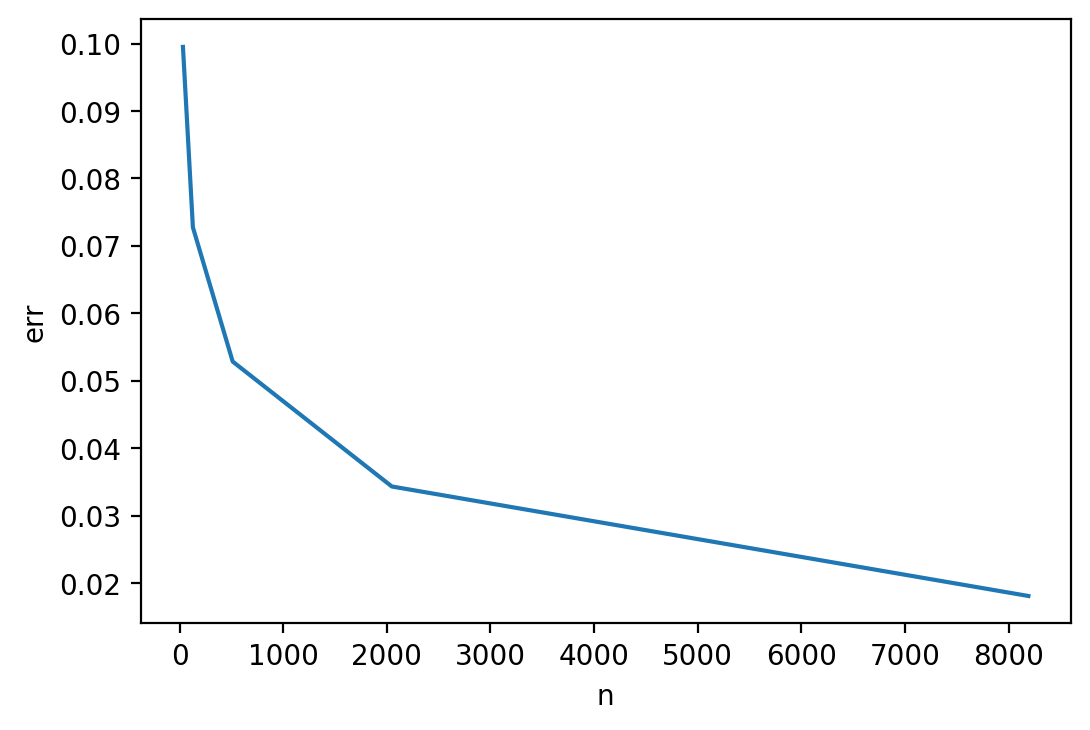

In [600]:
n=[32,128,512,2048,8192]
yerr=[sk_yerr32,sk_yerr128,sk_yerr512,sk_yerr2048,sk_yerr8192]
plt.figure(dpi=200)
plt.plot(n,yerr)
plt.xlabel('n')
plt.ylabel('err')

# Q4

In [622]:
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial
from sklearn.metrics import mean_squared_error

In [610]:
# test data
a, b = 0, 2 * np.pi  
n = 100

X_test = np.linspace(a, b, n)
Y_test = np.sin(X_test)

2.1649173439480373e+138


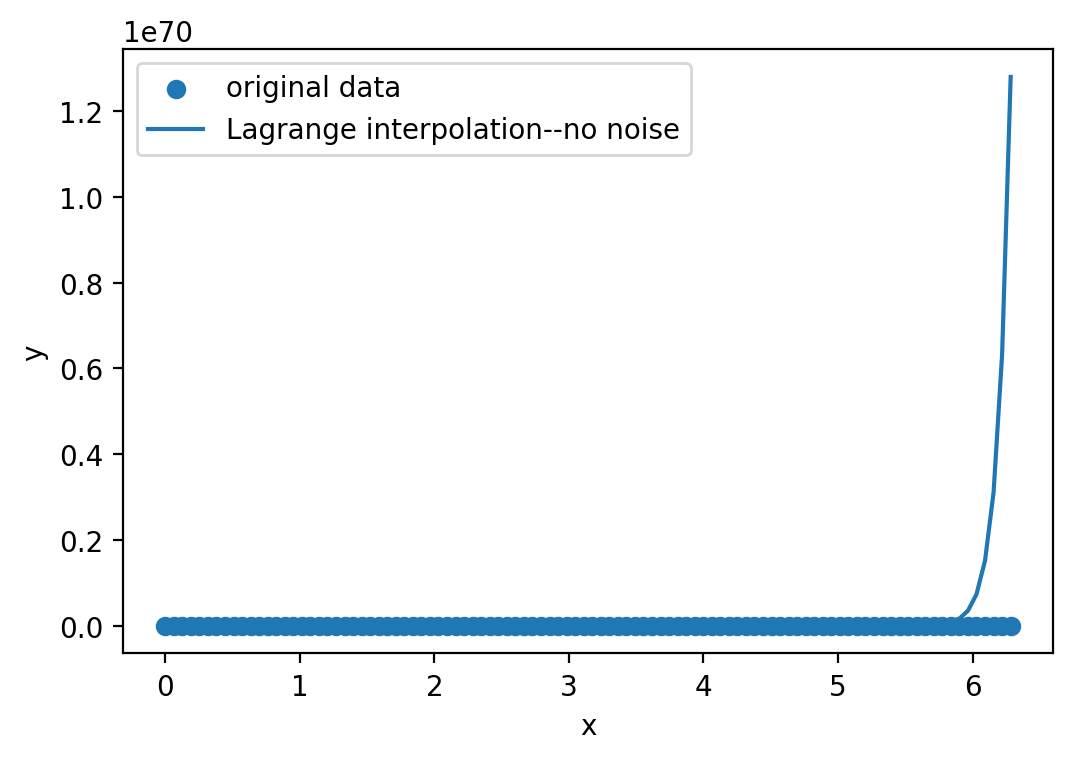

In [626]:
a, b = 0, 2 * np.pi  
n = 100

X_train = np.linspace(a, b, n)
Y_train = np.sin(X_train)

poly = lagrange(X_train, Y_train)
Y_poly=Polynomial(poly.coef[::-1])(X_test)

print(mean_squared_error(Y_poly,Y_test))

plt.figure(dpi=200)
plt.scatter(X_train, Y_train, label='original data')
plt.plot(X_test,Y_poly, label='Lagrange interpolation--no noise')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

2.1649173439480373e+138
4.9672599084524043e+70
1.7969247151109977e+21
9.347281694653265
12.766704741933525
9.403961296396918e-12
4.307025268299469e-09
1.0962876173296769e-08


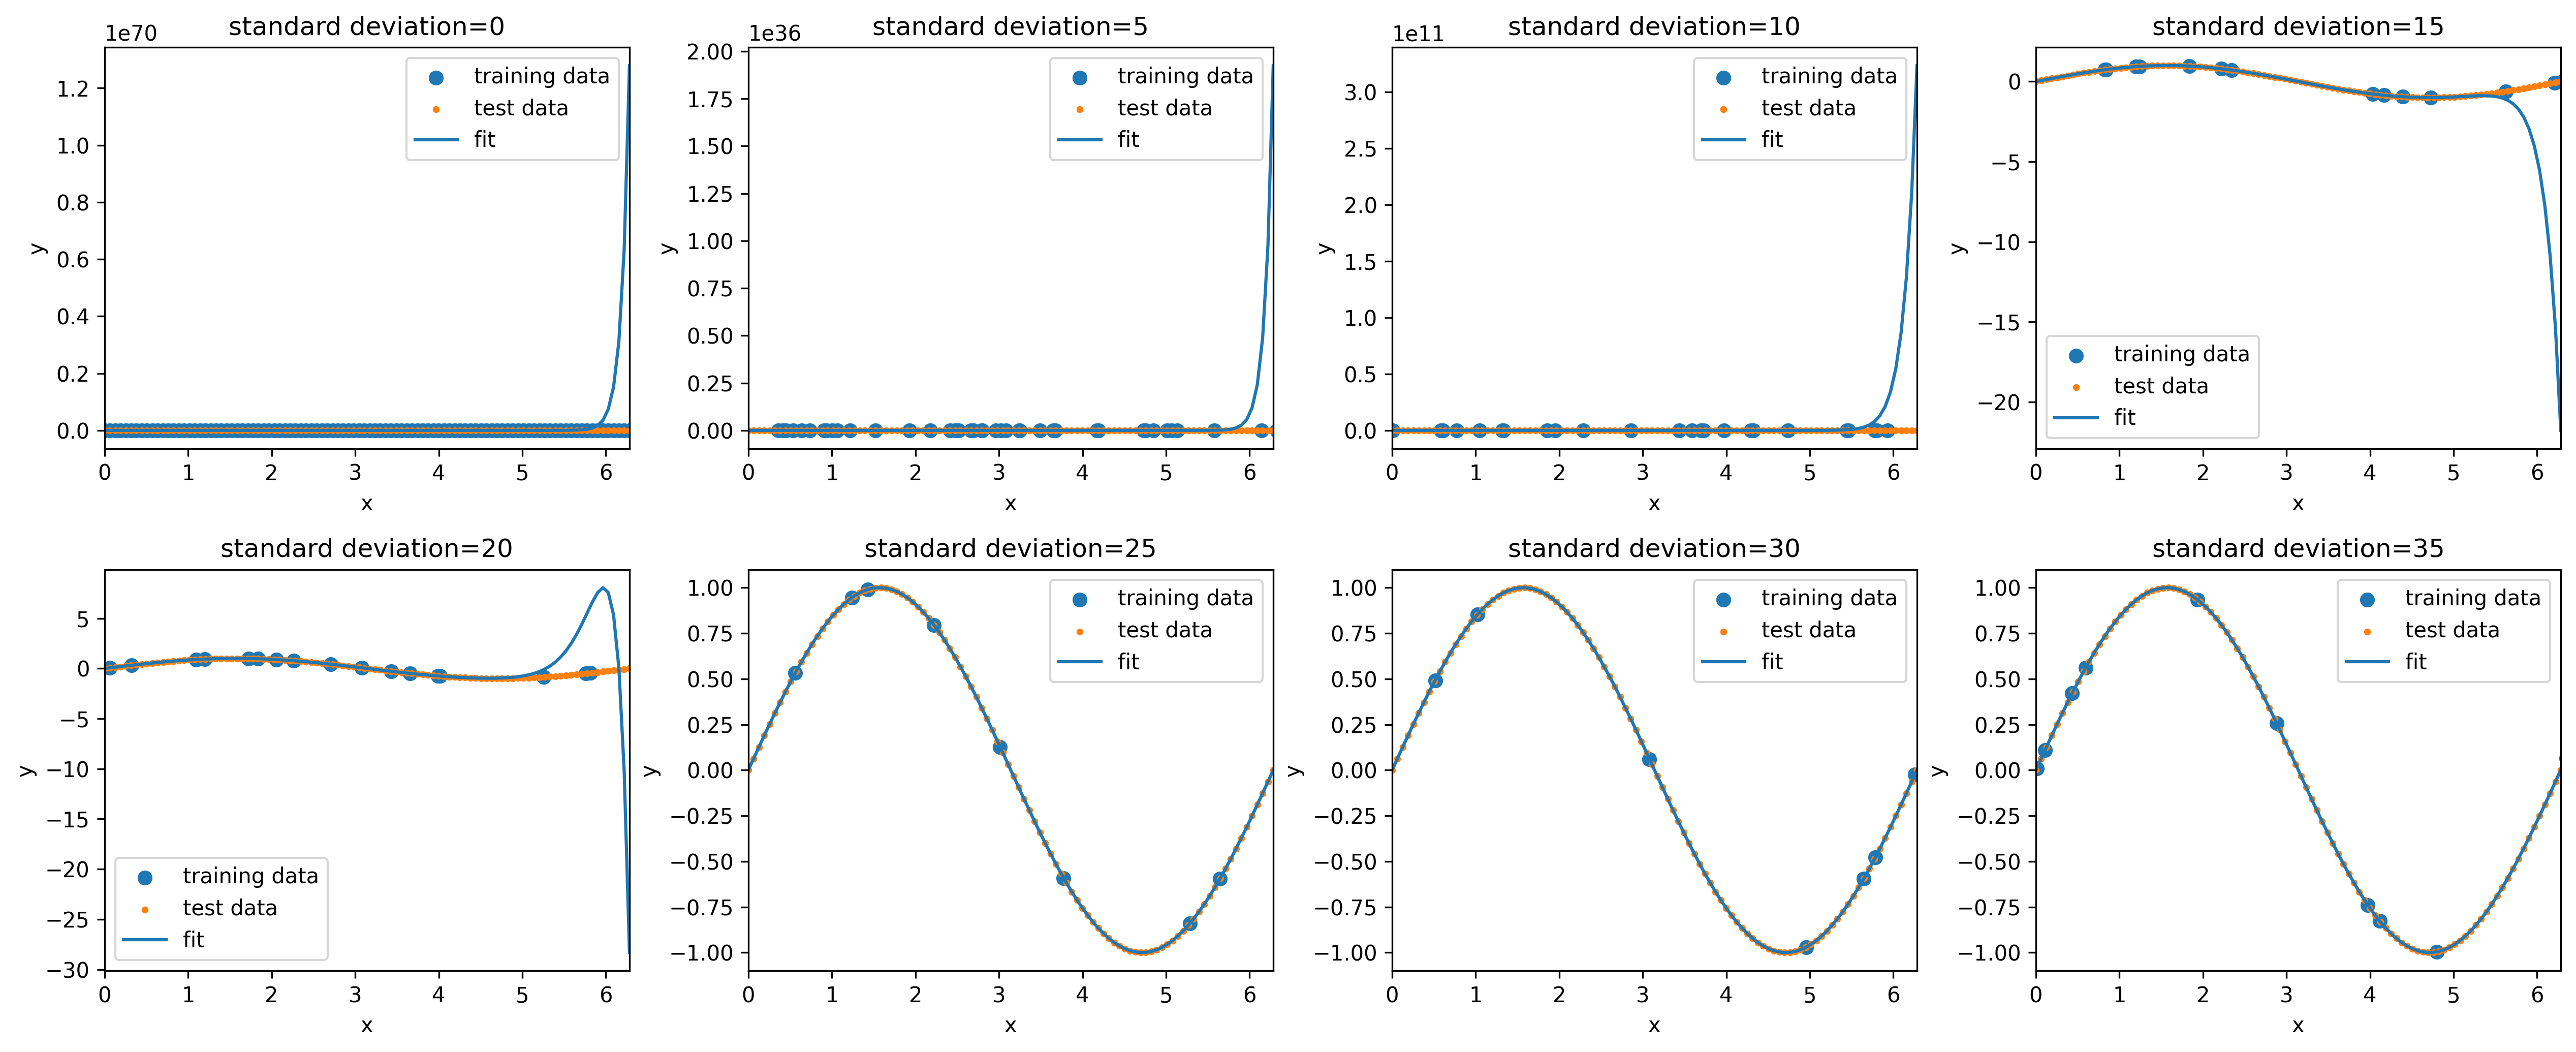

In [654]:
a, b = 0, 2 * np.pi  
n = 100
std_dev=[0,5,10,15,20,25,30,35,]
plt.figure(figsize=(17,7),dpi=300)

i=1
err_st=[]
for st in std_dev:
    epsilon = np.random.normal(0, st, n)


    X_train = np.linspace(a, b, n)+epsilon
    Y_train = np.sin(X_train)

    poly = lagrange(X_train, Y_train)
    Y_poly=Polynomial(poly.coef[::-1])(X_test)

    err_st.append(mean_squared_error(Y_poly,Y_test))
    print(mean_squared_error(Y_poly,Y_test))

    plt.subplot(2,4,i)
    plt.scatter(X_train, Y_train, label='training data')
    plt.scatter(X_test, Y_test, label='test data',s=5)
    plt.plot(X_test,Y_poly,label='fit')
    plt.ylabel('y')
    plt.xlabel('x')
    i+=1
    plt.xlim(a,b)
    plt.title('standard deviation=%.f'%st)
    plt.legend()
    
plt.tight_layout()

Text(0, 0.5, 'error')

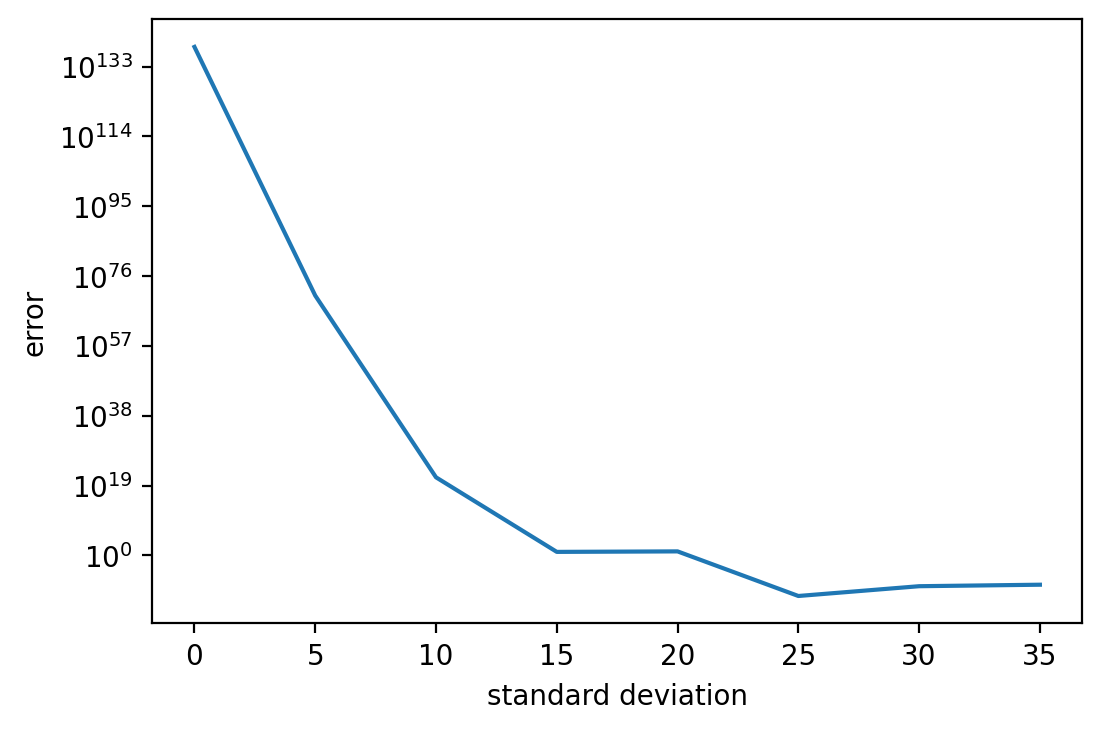

In [658]:
plt.figure(dpi=200)
plt.plot(std_dev,err_st)
plt.yscale('log')
plt.xlabel('standard deviation')
plt.ylabel('error')